In [1]:
import pandas as pd
import numpy as np
import json
import re
from collections import Counter

# Load raw dataset
df = pd.read_csv("recipes_vegetarian_strict_v2.csv")

print("📊 SHAPE:", df.shape)
print("\n📋 COLUMNS:", df.columns.tolist())
print("\n👀 SAMPLE:")
print(df.head(3).to_string())
print("\n❌ MISSING VALUES:")
print(df.isnull().sum())
print("\n📈 STATS:")
print(df[['num_ingredients', 'num_steps']].describe())
print("\n🏷️ TOP CATEGORIES:")
print(df['category'].value_counts().head())

📊 SHAPE: (34391, 8)

📋 COLUMNS: ['recipe_title', 'category', 'subcategory', 'description', 'ingredients', 'directions', 'num_ingredients', 'num_steps']

👀 SAMPLE:
                                 recipe_title           category        subcategory                                                                                                                                                                                                                                                  description                                                                                                                                                                                                                                          ingredients                                                                                                                                                                                                                                                                

In [2]:
# 1️⃣ REMOVE DUPLICATES
print("🧹 DUPLICATES:", df.duplicated().sum())
df_clean = df.drop_duplicates()

# 2️⃣ PARSE JSON ingredients/directions
def safe_parse_json(col):
    def parse_row(x):
        try:
            return json.loads(x.replace("'", '"'))
        except:
            return []
    return df_clean[col].apply(parse_row)

df_clean["ingredients_list"] = safe_parse_json("ingredients")
df_clean["directions_list"] = safe_parse_json("directions")

# 3️⃣ FILTER SHORT RECIPES (min 3 ingredients, min 2 steps)
df_clean = df_clean[
    (df_clean["num_ingredients"] >= 3) &
    (df_clean["num_steps"] >= 2)
].copy()

# 4️⃣ EXTRACT INGREDIENT TOKENS
def extract_tokens(ing_list):
    tokens = []
    for ing in ing_list:
        clean_ing = re.sub(r'^\d+.*?(cup|tbsp|tsp|ounce|lb|kg|ml|g).*? ', '', ing.lower())
        clean_ing = re.sub(r'[^\w\s]', '', clean_ing).strip()
        if clean_ing and len(clean_ing) > 2:
            tokens.extend(clean_ing.split())
    return tokens

df_clean["ingredient_tokens"] = df_clean["ingredients_list"].apply(extract_tokens)

# 5️⃣ FINAL STATS
print(f"\n✅ CLEANED: {df_clean.shape[0]} recipes (-{df.shape[0]-df_clean.shape[0]})")
print(f"📊 AVG ingredients: {df_clean['num_ingredients'].mean():.1f}")
print(f"📊 AVG steps: {df_clean['num_steps'].mean():.1f}")
print("\n👀 CLEAN SAMPLE:")
print(df_clean[["recipe_title", "num_ingredients", "num_steps", "ingredient_tokens"]].head(2).to_string())

# 6️⃣ SAVE CLEANED
df_clean.to_csv("recipes_cleaned_final.csv", index=False)
print("\n💾 SAVED: recipes_cleaned_final.csv")


🧹 DUPLICATES: 0

✅ CLEANED: 31164 recipes (-3227)
📊 AVG ingredients: 8.6
📊 AVG steps: 4.8

👀 CLEAN SAMPLE:
                                 recipe_title  num_ingredients  num_steps                                                                                                                                                                                   ingredient_tokens
0  Air Fryer Potato Slices with Dipping Sauce                9          5  [ketchup, beer, 1, tablespoon, worcestershire, sauce, 12, teaspoon, onion, powder, 14, teaspoon, cayenne, potatoes, olive, oil, cooking, spray, powder, salt, and, freshly, ground, black, pepper]
1                   Air Fryer Corn on The Cob                6          4   [¼, cup, mayonnaise, 2, teaspoons, crumbled, cotija, cheese, 1, teaspoon, lime, juice, ¼, teaspoon, chili, powder, 2, ears, corn, shucked, and, halved, fresh, cilantro, or, to, taste, optional]

💾 SAVED: recipes_cleaned_final.csv


In [3]:
print(df_clean.shape)
df_clean.head(2)

(31164, 11)


,recipe_title,category,subcategory,description,ingredients,directions,num_ingredients,num_steps,ingredients_list,directions_list,ingredient_tokens
0,Air Fryer Potato Slices with Dipping Sauce,Air Fryer Recipes,Air Fryer Recipes,"These air fryer potato slices, served with a b...","[""3/4 cup ketchup"", ""1/2 cup beer"", ""1 tablesp...","[""Combine ketchup, beer, Worcestershire sauce,...",9,5,"[3/4 cup ketchup, 1/2 cup beer, 1 tablespoon W...","[Combine ketchup, beer, Worcestershire sauce, ...","[ketchup, beer, 1, tablespoon, worcestershire,..."
1,Air Fryer Corn on The Cob,Air Fryer Recipes,Air Fryer Recipes,Air fryer corn on the cob is super quick to ma...,"[""\u00bc cup mayonnaise"", ""2 teaspoons crumble...","[""Preheat an air fryer to 400 degrees F (200 d...",6,4,"[¼ cup mayonnaise, 2 teaspoons crumbled cotija...",[Preheat an air fryer to 400 degrees F (200 de...,"[¼, cup, mayonnaise, 2, teaspoons, crumbled, c..."


C:\Users\Chantal Silva\AppData\Local\Temp\ipykernel_13092\436310375.py:37: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chantal Silva\AppData\Local\Temp\ipykernel_13092\436310375.py:37: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chantal Silva\AppData\Local\Temp\ipykernel_13092\436310375.py:37: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chantal Silva\AppData\Local\Temp\ipykernel_13092\436310375.py:37: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chantal Silva\AppData\Local\Temp\ipykernel_13092\436310375.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Chantal Silva\AppData\Local\Temp\ipykernel_13092\436310375.py:38: UserWarning: Glyph 128993 (\N

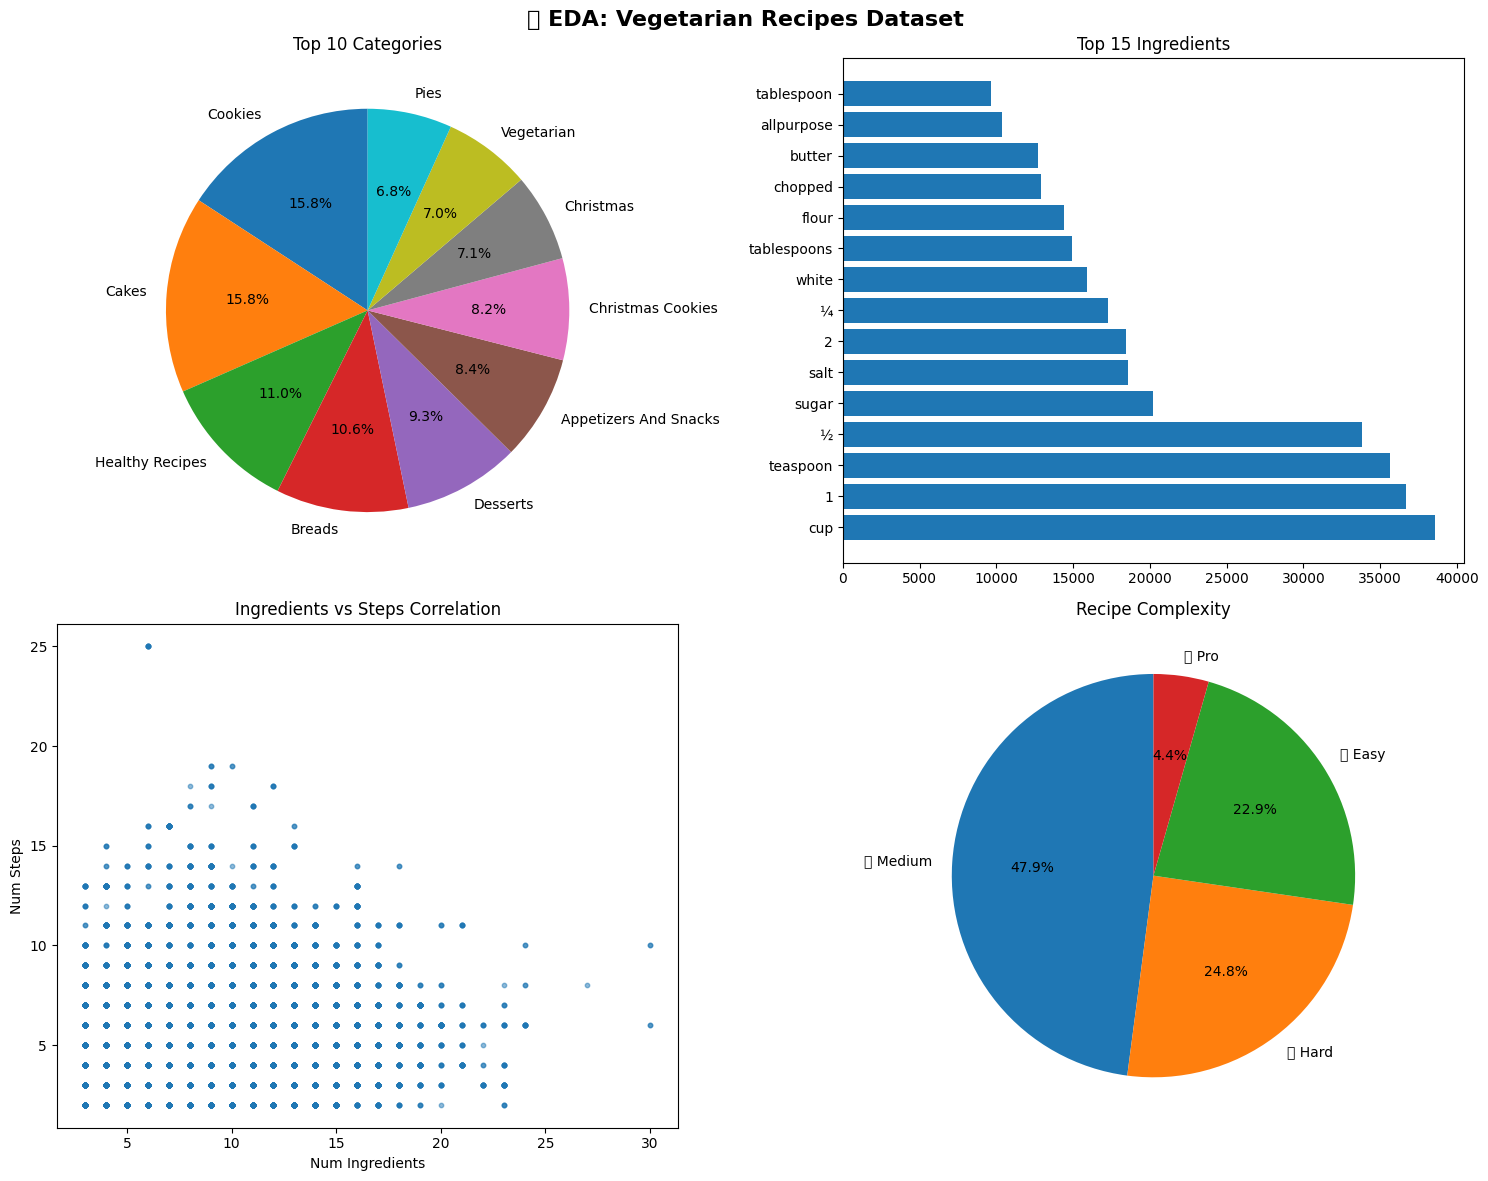

📈 4 GRÁFICOS EDA salvos: eda_plots.png

🔥 INSIGHTS:
- Top category: Cookies (1739 recipes)
- Top ingredient: cup (38537 mentions)
- Corr coef: 0.159


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 EDA: Vegetarian Recipes Dataset', fontsize=16, fontweight='bold')

# 1️⃣ TOP CATEGORIES
top_cats = df_clean['category'].value_counts().head(10)
axes[0,0].pie(top_cats.values, labels=top_cats.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Top 10 Categories')

# 2️⃣ TOP INGREDIENTS (all tokens)
all_tokens = [token for tokens in df_clean['ingredient_tokens'] for token in tokens]
top_ing = Counter(all_tokens).most_common(15)
axes[0,1].barh(range(len(top_ing)), [x[1] for x in top_ing])
axes[0,1].set_yticks(range(len(top_ing)))
axes[0,1].set_yticklabels([x[0] for x in top_ing])
axes[0,1].set_title('Top 15 Ingredients')

# 3️⃣ INGREDIENTS vs STEPS CORRELATION
axes[1,0].scatter(df_clean['num_ingredients'], df_clean['num_steps'], alpha=0.5, s=10)
axes[1,0].set_xlabel('Num Ingredients')
axes[1,0].set_ylabel('Num Steps')
axes[1,0].set_title('Ingredients vs Steps Correlation')

# 4️⃣ RECIPES BY COMPLEXITY
df_clean['complexity'] = pd.cut(df_clean['num_ingredients'] * df_clean['num_steps'], 
                               bins=[0, 20, 50, 100, np.inf], 
                               labels=['🟢 Easy', '🟡 Medium', '🟠 Hard', '🔴 Pro'])
complex_dist = df_clean['complexity'].value_counts()
axes[1,1].pie(complex_dist.values, labels=complex_dist.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Recipe Complexity')

plt.tight_layout()
plt.savefig('eda_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("📈 4 GRÁFICOS EDA salvos: eda_plots.png")
print(f"\n🔥 INSIGHTS:")
print(f"- Top category: {top_cats.index[0]} ({top_cats.iloc[0]} recipes)")
print(f"- Top ingredient: {top_ing[0][0]} ({top_ing[0][1]} mentions)")
print(f"- Corr coef: {df_clean['num_ingredients'].corr(df_clean['num_steps']):.3f}")